In [65]:
import tensorflow as tf
from tensorflow import keras

# "Sequential" model lets us to define a stack of neural network layers
from keras.models import Sequential

# import the "core" layers:
from keras.layers import Dense, Dropout, Activation, Flatten

# CNN
from keras.layers import Convolution2D, MaxPooling2D, Conv2DTranspose

# import some utilities to transform our data
from keras.utils import np_utils

import numpy as np

from tensorflow.keras import layers

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

Import and split the dataset

In [66]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

Intentionally adding noise to the dataset

In [67]:
def noise(array):
    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=array.shape)
    return np.clip(noisy_array, 0.0, 1.0)

In [68]:
noisy_X_train = noise(X_train)
noisy_X_test = noise(X_test)

Below we plot a normal sample and its noisy equivalent

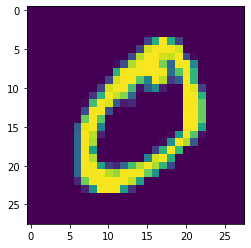

In [69]:
%matplotlib inline

imgplot = plt.imshow(X_train[1])
plt.show()

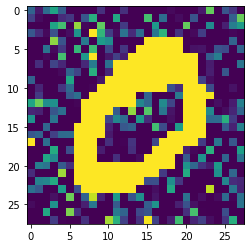

In [70]:
plt.imshow(noisy_X_train[1])

In [71]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

noisy_X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
noisy_X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [72]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

noisy_X_train = X_train.astype('float32')
noisy_X_test = X_test.astype('float32')
noisy_X_train /= 255
noisy_X_test /= 255

X_train.shape

(60000, 28, 28, 1)

In [73]:
model = Sequential()
# Encoder:
model.add(Convolution2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Convolution2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))

In [74]:
# Decoder:
model.add(Conv2DTranspose(32, (3, 3), strides=2,activation="relu", padding="same"))
model.add(Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Convolution2D(1, (3, 3), activation="sigmoid", padding="same"))

In [75]:
model.compile(optimizer="adam", loss="binary_crossentropy")

In [45]:
model.fit(noisy_X_train, X_train, batch_size=128, epochs=5)

Epoch 1/5
469/469 [==============================] - 88s 186ms/step - loss: 0.4208
Epoch 2/5
469/469 [==============================] - 92s 197ms/step - loss: 0.1623
Epoch 3/5
469/469 [==============================] - 97s 207ms/step - loss: 0.1218
Epoch 4/5
469/469 [==============================] - 104s 222ms/step - loss: 0.1046
Epoch 5/5
469/469 [==============================] - 100s 212ms/step - loss: 0.0971


In [78]:
predictions = model.predict(noisy_X_test)

TypeError: Invalid shape (28, 28, 1) for image data

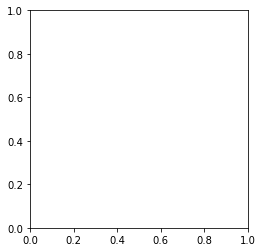

In [79]:
imgplot = plt.imshow(noisy_X_test[1,:,:],cmap='viridis')
plt.show()
imgplot = plt.imshow(predictions[1,:,:],cmap='viridis')
plt.show()